In [45]:
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from pandas import DataFrame
import scipy.stats as st

In [46]:
school_info = os.path.abspath('dv331_schoollocations2022 (1).csv')
school_info = pd.read_csv('dv331_schoollocations2022 (1).csv', encoding='latin1')
df = pd.read_excel('Check Data Population, House Price, Crime.xlsx', sheet_name='Summary')

time_price= os.path.abspath('Copy-of-Suburb_HouseV2022z (1).xlsx')
price = pd.read_excel(time_price)

criminal_incident=os.path.abspath('Data_Tables_LGA_Criminal_Incidents_Year_Ending_March_2023 (2).xlsx')
data=pd.read_excel(criminal_incident, sheet_name='Table 03')


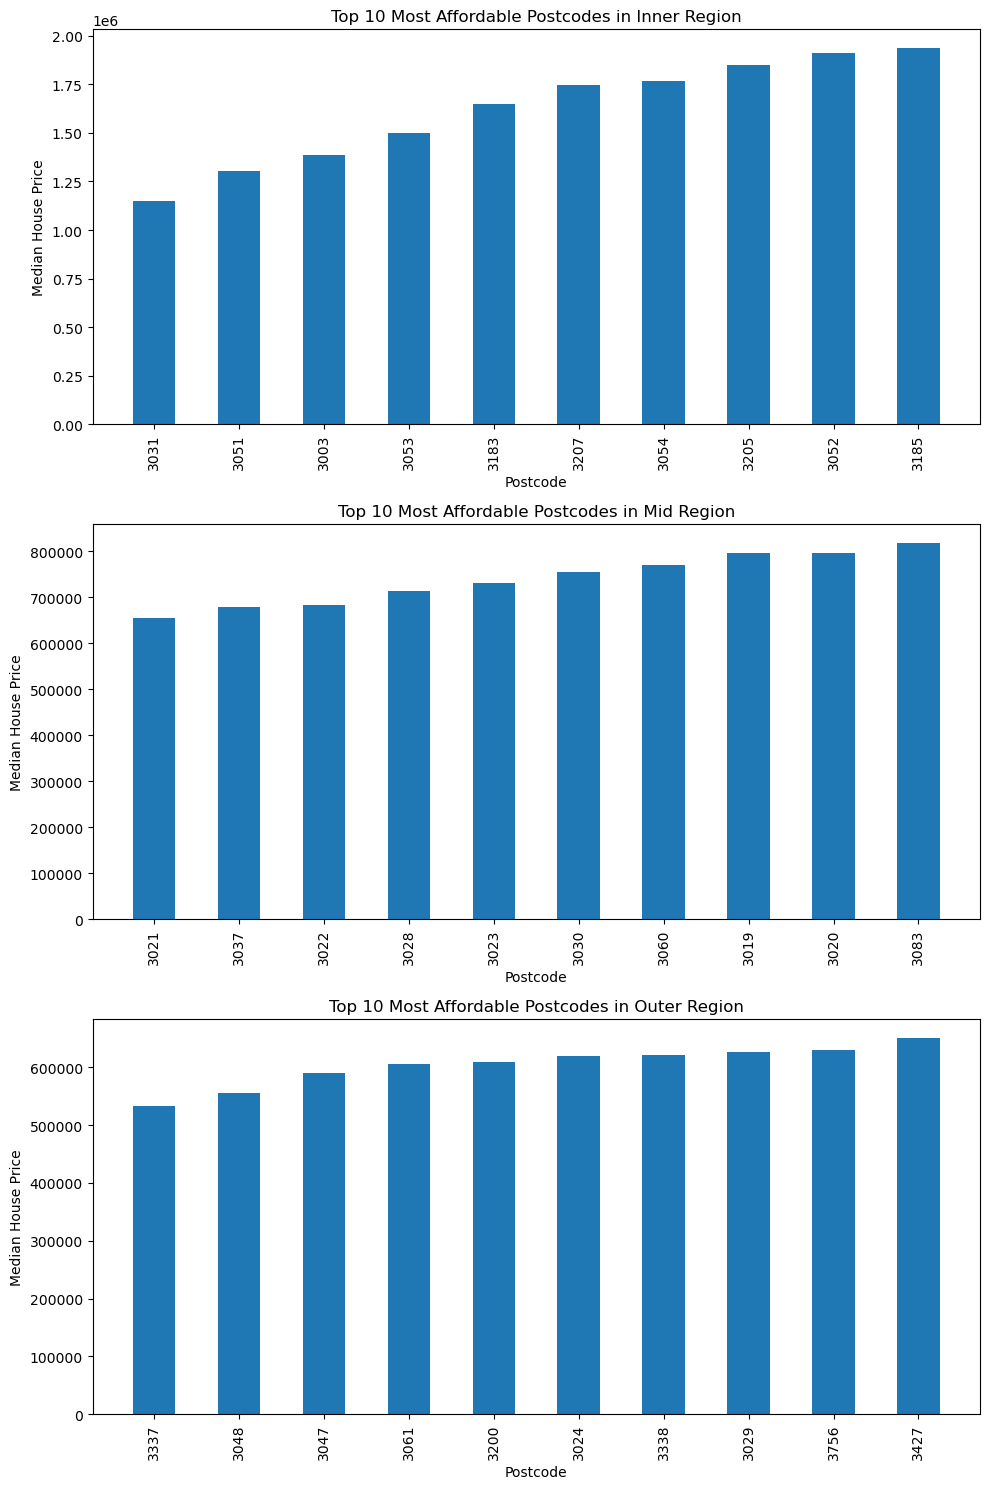

In [47]:
# Filter by region (inner, mid, outer)
inner_df = df[df['SUBURB_GROUP'] == 'Inner']
mid_df = df[df['SUBURB_GROUP'] == 'Mid']
outer_df = df[df['SUBURB_GROUP'] == 'Outer']

# Sort by median house price in ascending order
inner_sorted = inner_df.sort_values('Median house price')
mid_sorted = mid_df.sort_values('Median house price')
outer_sorted = outer_df.sort_values('Median house price')

# Select top 10 most affordable postcodes
inner_top10 = inner_sorted.head(10)
mid_top10 = mid_sorted.head(10)
outer_top10 = outer_sorted.head(10)

# Create separate bar graphs for each region
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

# Bar graph for inner region
x_labels_inner = inner_top10['POST_CODE']
x_pos_inner = np.arange(len(x_labels_inner))
ax1.bar(x_pos_inner, inner_top10['Median house price'], width=0.5)
ax1.set_xlabel('Postcode')
ax1.set_ylabel('Median House Price')
ax1.set_title('Top 10 Most Affordable Postcodes in Inner Region')
ax1.set_xticks(x_pos_inner)
ax1.set_xticklabels(x_labels_inner, rotation='vertical')

# Bar graph for mid region
x_labels_mid = mid_top10['POST_CODE']
x_pos_mid = np.arange(len(x_labels_mid))
ax2.bar(x_pos_mid, mid_top10['Median house price'], width=0.5)
ax2.set_xlabel('Postcode')
ax2.set_ylabel('Median House Price')
ax2.set_title('Top 10 Most Affordable Postcodes in Mid Region')
ax2.set_xticks(x_pos_mid)
ax2.set_xticklabels(x_labels_mid, rotation='vertical')

# Bar graph for outer region
x_labels_outer = outer_top10['POST_CODE']
x_pos_outer = np.arange(len(x_labels_outer))
ax3.bar(x_pos_outer, outer_top10['Median house price'], width=0.5)
ax3.set_xlabel('Postcode')
ax3.set_ylabel('Median House Price')
ax3.set_title('Top 10 Most Affordable Postcodes in Outer Region')
ax3.set_xticks(x_pos_outer)
ax3.set_xticklabels(x_labels_outer, rotation='vertical')

# Adjust spacing between subplots
plt.tight_layout()

# Display the graphs
plt.show()


In [48]:
#Instead of bar graphs, here's a dataframe showing postcode and its median house price for top 10 in each region
concat_df = pd.concat([inner_top10,mid_top10,outer_top10])
top10eachdf = concat_df[["POST_CODE","SUBURB_GROUP","Median house price"]]
top10eachdf.to_csv("Kashif output/top10_affordable_by_suburb_group.csv")
top10eachdf

,POST_CODE,SUBURB_GROUP,Median house price
18,3031,Inner,1.151750e+06
34,3051,Inner,1.305000e+06
1,3003,Inner,1.387500e+06
36,3053,Inner,1.500000e+06
135,3183,Inner,1.648500e+06
157,3207,Inner,1.748000e+06
37,3054,Inner,1.768750e+06
155,3205,Inner,1.850000e+06
35,3052,Inner,1.910000e+06
137,3185,Inner,1.936667e+06


### 2

<Figure size 1000x600 with 0 Axes>

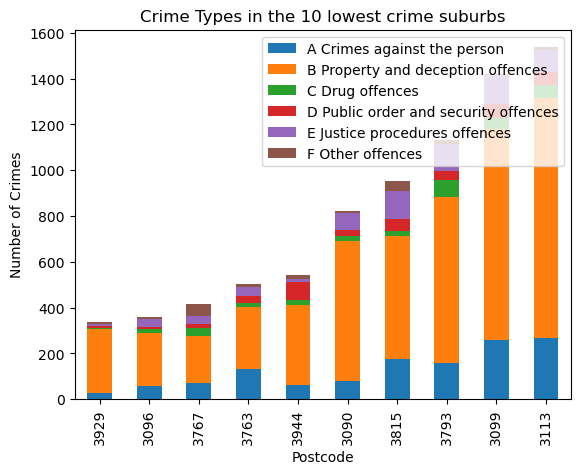

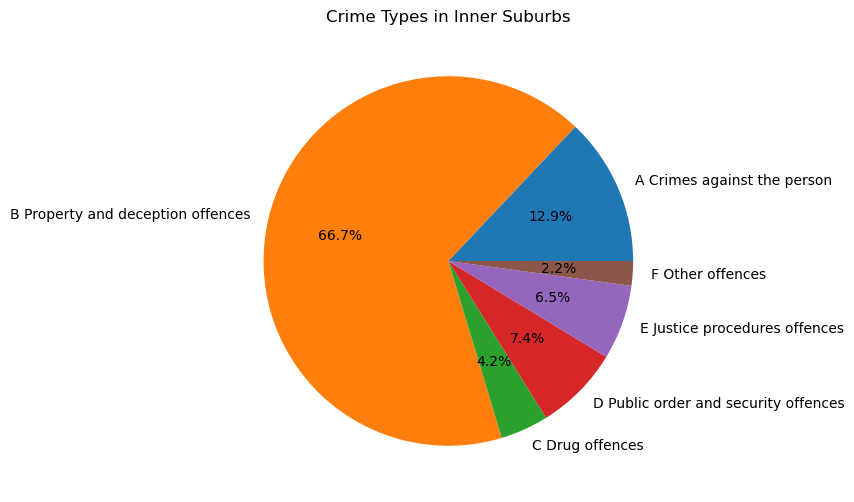

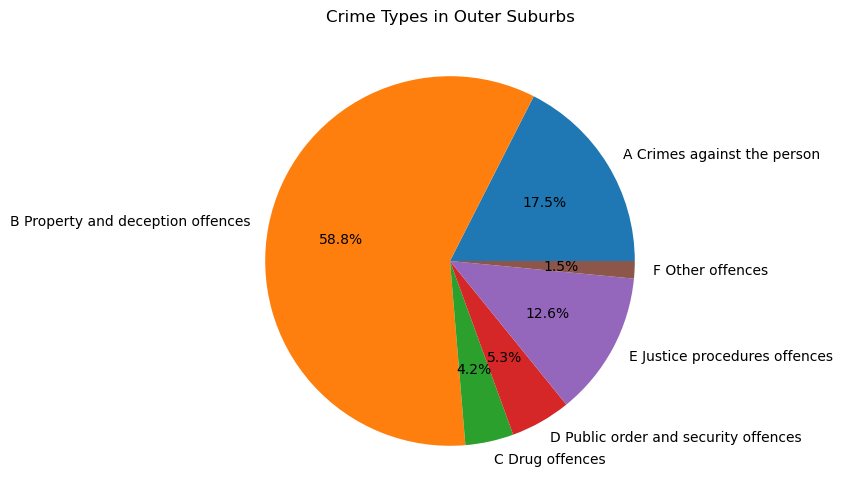

Average Number of Crimes in Outer Suburbs:
A Crimes against the person             2211.492958
B Property and deception offences       7426.873239
C Drug offences                          533.563380
D Public order and security offences     667.605634
E Justice procedures offences           1595.549296
F Other offences                         192.183099
dtype: float64

Average Number of Crimes in Inner Suburbs:
A Crimes against the person             1710.266667
B Property and deception offences       8816.866667
C Drug offences                          555.866667
D Public order and security offences     982.933333
E Justice procedures offences            863.400000
F Other offences                         284.133333
dtype: float64

Summary Statistics:
         POST_CODE  Median house price     Population  \
count   197.000000        1.970000e+02     197.000000   
mean   3244.685279        1.315195e+06   24565.411168   
std     289.440298        7.203211e+05   19984.923171   
min    300

In [49]:
lowest_gt_suburbs = df.nsmallest(10, 'Grand Total')
crime_types = ['A Crimes against the person', 'B Property and deception offences', 'C Drug offences', 'D Public order and security offences', 'E Justice procedures offences', 'F Other offences']
# Create a subset dataframe with the crime types and postcode for the 10 suburbs
df_lowest_gt_crime_types = lowest_gt_suburbs[crime_types + ['POST_CODE']]

# Set the postcode as the index for the dataframe
df_lowest_gt_crime_types.set_index('POST_CODE', inplace=True)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
df_lowest_gt_crime_types.plot(kind='bar', stacked=True)
plt.xlabel('Postcode')
plt.ylabel('Number of Crimes')
plt.title('Crime Types in the 10 lowest crime suburbs')
plt.legend(loc='upper right')
plt.savefig("Kashif output/fig1_crime_lowest.png",bbox_inches="tight")
plt.show()

# Filter the dataframe for inner and outer suburbs
inner_suburbs = df[df['SUBURB_GROUP'] == 'Inner']
outer_suburbs = df[df['SUBURB_GROUP'] == 'Outer']

# Calculate the total number of crimes for each crime type in the inner suburbs
inner_crime_totals = inner_suburbs[crime_types].sum()

# Calculate the total number of crimes for each crime type in the outer suburbs
outer_crime_totals = outer_suburbs[crime_types].sum()

# Plot the pie chart for inner suburbs
plt.figure(figsize=(8, 6))
plt.pie(inner_crime_totals, labels=crime_types, autopct='%1.1f%%')
plt.title('Crime Types in Inner Suburbs')
plt.savefig("Kashif output/fig2_crime_inner.png",bbox_inches="tight")
plt.show()

# Plot the pie chart for outer suburbs
plt.figure(figsize=(8, 6))
plt.pie(outer_crime_totals, labels=crime_types, autopct='%1.1f%%')
plt.title('Crime Types in Outer Suburbs')
plt.savefig("Kashif output/fig3_crime_outer.png",bbox_inches="tight")
plt.show()

# Calculate the average number of crimes in the outer suburbs
outer_avg_crimes = df[df['SUBURB_GROUP'] == 'Outer'][crime_types].mean()

# Calculate the average number of crimes in the inner suburbs
inner_avg_crimes = df[df['SUBURB_GROUP'] == 'Inner'][crime_types].mean()

# Print the average number of crimes
print("Average Number of Crimes in Outer Suburbs:")
print(outer_avg_crimes)
print("\nAverage Number of Crimes in Inner Suburbs:")
print(inner_avg_crimes)

# Calculate summary statistics
summary_stats = df.describe()

# Print summary statistics
print("")
print("Summary Statistics:")
print(summary_stats)


# Calculate outliers in Population
Q1_population = df['Population'].quantile(0.25)
Q3_population = df['Population'].quantile(0.75)
IQR_population = Q3_population - Q1_population
lower_bound_population = Q1_population - 1.5 * IQR_population
upper_bound_population = Q3_population + 1.5 * IQR_population
population_outliers = df[(df['Population'] < lower_bound_population) | (df['Population'] > upper_bound_population)]
population_outliers = population_outliers[['POST_CODE', 'Population']].reset_index(drop=True)
print("Population Outliers:")
print(population_outliers)

# Calculate outliers in Median house price
Q1_house_price = df['Median house price'].quantile(0.25)
Q3_house_price = df['Median house price'].quantile(0.75)
IQR_house_price = Q3_house_price - Q1_house_price
lower_bound_house_price = Q1_house_price - 1.5 * IQR_house_price
upper_bound_house_price = Q3_house_price + 1.5 * IQR_house_price
house_price_outliers = df[(df['Median house price'] < lower_bound_house_price) | (df['Median house price'] > upper_bound_house_price)]
house_price_outliers = house_price_outliers[['POST_CODE', 'Median house price']].reset_index(drop=True)
print("\nMedian House Price Outliers:")
print(house_price_outliers)

# Calculate outliers in Grand Total
Q1_grand_total = df['Grand Total'].quantile(0.25)
Q3_grand_total = df['Grand Total'].quantile(0.75)
IQR_grand_total = Q3_grand_total - Q1_grand_total
lower_bound_grand_total = Q1_grand_total - 1.5 * IQR_grand_total
upper_bound_grand_total = Q3_grand_total + 1.5 * IQR_grand_total
grand_total_outliers = df[(df['Grand Total'] < lower_bound_grand_total) | (df['Grand Total'] > upper_bound_grand_total)]
grand_total_outliers = grand_total_outliers[['POST_CODE', 'Grand Total']].reset_index(drop=True)
print("\nOutliers by total crime:")
print(grand_total_outliers)



In [50]:
df1 = df[['POST_CODE', 'SUBURB_GROUP']]

### 3

     Postal_Postcode  School_Count
0               3030            33
1               3977            22
2               3064            21
3               3029            21
4               3150            21
..               ...           ...
185             3763             1
186             3427             1
187             3061             1
188             3003             1
189             3190             1

[190 rows x 2 columns]


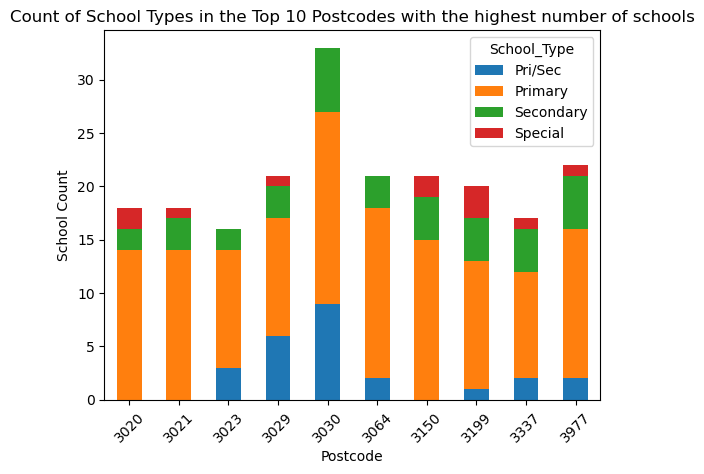

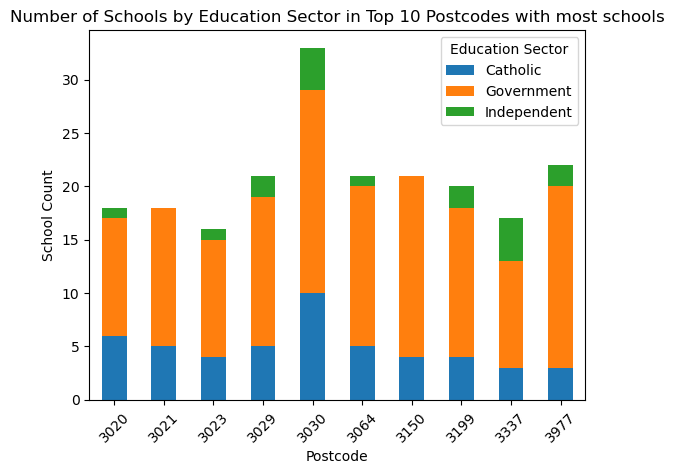

In [51]:
summary_school = pd.merge(school_info, df1, left_on='Postal_Postcode', right_on='POST_CODE', how='inner')
summary_school = summary_school.drop('POST_CODE', axis=1)
school_count = summary_school['Postal_Postcode'].value_counts().reset_index()
school_count.columns = ['Postal_Postcode', 'School_Count']
print(school_count)

top_postcodes = summary_school['Postal_Postcode'].value_counts().nlargest(10).index
df_top_postcodes = summary_school[summary_school['Postal_Postcode'].isin(top_postcodes)]

school_counts = df_top_postcodes.groupby(['Postal_Postcode', 'School_Type']).size().unstack()

school_counts.plot(kind='bar', stacked=True)
plt.xlabel('Postcode')
plt.xticks(rotation=45)
plt.ylabel('School Count')
plt.title('Count of School Types in the Top 10 Postcodes with the highest number of schools')
plt.savefig("Kashif output/fig4_postcode_most_school_by_type.png",bbox_inches="tight")
plt.show()

top_postcodes = summary_school['Postal_Postcode'].value_counts().nlargest(10).index
df_top_postcodes = summary_school[summary_school['Postal_Postcode'].isin(top_postcodes)]

education_counts = df_top_postcodes.groupby(['Postal_Postcode', 'Education_Sector']).size().unstack()

education_counts.plot(kind='bar', stacked=True)
plt.xlabel('Postcode')
plt.xticks(rotation=45)
plt.ylabel('School Count')
plt.title('Number of Schools by Education Sector in Top 10 Postcodes with most schools')
plt.legend(title='Education Sector')
plt.savefig("Kashif output/fig5_education_sector_most_schools.png",bbox_inches="tight")
plt.show()




### 3


In [52]:
top_10_suburbs = price.sort_values(by='Growth PA', ascending=False).head(5)
# data_dict = {}

# for index, row in top_10_suburbs.iterrows():
#     locality = row['locality']
#     values = row.iloc[1:12].tolist()
#     data_dict[locality] = values

# price_columns = list(top_10_suburbs.columns[1:12])

# data_dict
# price_columns 
# for key, values in data_dict.items():
#     plt.plot(price_columns, values, label=key)

# # Formatting the graph
# plt.xlabel('Years')
# plt.ylabel('Median House Price')
# plt.title('Time series of Median House Price growth for fastest growing suburbs')
# plt.legend()
# plt.xticks(rotation=45)
# plt.yticks(range(385000, 100000, 342000))
# # Displaying the graph
# plt.show()

In [53]:
top_10_suburbs.columns

Index(['locality', 'Median (2012)', 'Median (2013)', 'Median (2014)',
       'Median (2015)', 'Median (2016)', 'Median (2017)', 'Median (2018)',
       'Median (2019)', 'Median (2020)', 'Median (2021)', 'Median (2022)',
       'Median(2023)', '2021-2022', '2021-2022.1', 'Growth PA'],
      dtype='object')

In [54]:
grouped_df = data.groupby(["Postcode", "Year"]).agg({"Incidents Recorded": "sum"})
grouped_df=grouped_df.groupby(["Postcode", "Year"]).agg({"Incidents Recorded": "max"})
max_postcodes = grouped_df.loc[grouped_df.groupby("Year")["Incidents Recorded"].idxmax(), :]
print('********* incident recorded each year for all postcodes********')
print(grouped_df)
print('********* postcodes with maximum incident recorded each year ********')
print(max_postcodes)
print('********* postcodes with minimum incident recorded each year ********')
min_postcodes = grouped_df.loc[grouped_df.groupby("Year")["Incidents Recorded"].idxmin(), :]
print(min_postcodes)
least_incidents_postcode = grouped_df.groupby("Postcode").sum().sort_values("Incidents Recorded").head(10)
print('********* Top 10 postcode with minimum incident recorded for all years ********')
least_incidents_postcode

********* incident recorded each year for all postcodes********
               Incidents Recorded
Postcode Year                    
3000     2014               12930
         2015               12038
         2016               12285
         2017               13888
         2018               13139
...                           ...
3996     2019                 158
         2020                 155
         2021                 213
         2022                 167
         2023                 189

[6896 rows x 1 columns]
********* postcodes with maximum incident recorded each year ********
               Incidents Recorded
Postcode Year                    
3000     2014               12930
         2015               12038
         2016               12285
         2017               13888
         2018               13139
         2019               12866
         2020               13192
         2021               11695
         2022               11287
         2023            

,Incidents Recorded
Postcode,
3852,10
3893,11
3647,12
3415,17
3576,20
3708,21
3506,22
3529,22
3704,23


Correlation Coefficient: -0.22615460421875477
Slope: -0.0035856130972283977
Intercept: 17191.383580875732
R-squared: 0.05114590500934159


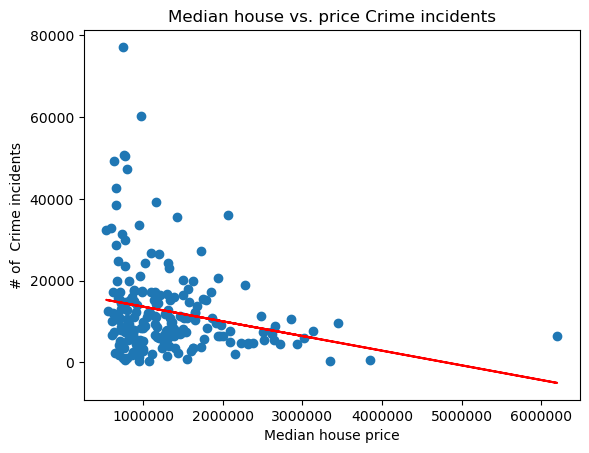

In [55]:
# Calculate the correlation coefficient
correlation_coefficient, p_value = st.pearsonr(df['Median house price'], df['Grand Total'])
print("Correlation Coefficient:", correlation_coefficient)


# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(df['Median house price'], df['Grand Total'])
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)

# Plot the scatter plot and linear regression line
plt.scatter(df['Median house price'], df['Grand Total'])
plt.plot(df['Median house price'], intercept + slope * df['Median house price'], color='red')
plt.xlabel('Median house price')
plt.ylabel('# of  Crime incidents')
plt.title('Median house vs. price Crime incidents')
plt.ticklabel_format(useOffset=False,style="plain")
plt.savefig("Kashif output/fig6_crime_price_correlation.png",bbox_inches="tight")
plt.show()

Correlation Coefficient: -0.18625783186401723
Slope: -1.2795777668458094e-06
Intercept: 8.22040560727031
R-squared: 0.03469197993068452


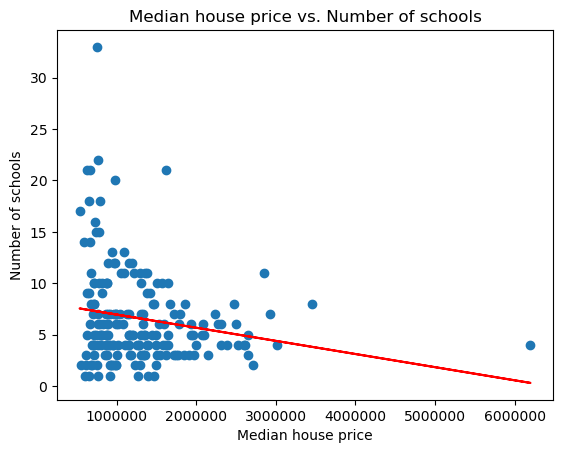

In [56]:

postcode_school_count = school_info.groupby("Postal_Postcode").size().reset_index(name='Number_of_Schools')

data_2 = pd.merge(postcode_school_count, df, left_on='Postal_Postcode', right_on='POST_CODE', how='inner')
data_2 = data_2.drop('POST_CODE', axis=1)
data_2

# Calculate the correlation coefficient
correlation_coefficient, p_value = st.pearsonr(data_2['Median house price'], data_2['Number_of_Schools'])
print("Correlation Coefficient:", correlation_coefficient)


# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(data_2['Median house price'], data_2['Number_of_Schools'])
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)

# Plot the scatter plot and linear regression line
plt.scatter(data_2['Median house price'], data_2['Number_of_Schools'])
plt.plot(data_2['Median house price'], intercept + slope * data_2['Median house price'], color='red')
plt.xlabel('Median house price')
plt.ticklabel_format(useOffset=False,style="plain")
plt.ylabel('Number of schools')
plt.title('Median house price vs. Number of schools')
plt.savefig("Kashif output/fig7_school_price_correlation.png",bbox_inches="tight")
plt.show()






Correlation Coefficient: 0.7395509246873357
Slope: 1813.9679227236218
Intercept: 934.2003395694555
R-squared: 0.5469355702058926


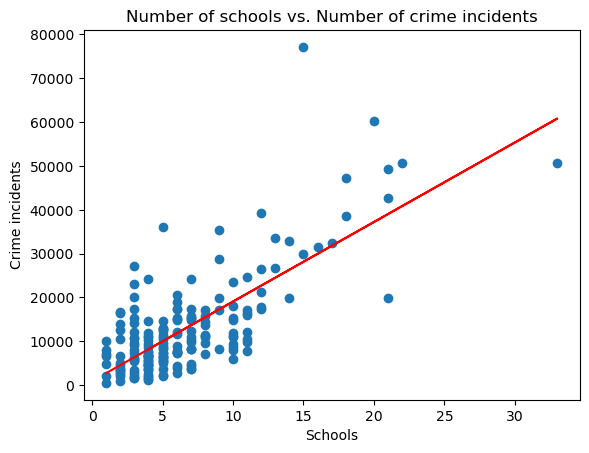

In [57]:
# Calculate the correlation coefficient
correlation_coefficient, p_value = st.pearsonr(data_2['Number_of_Schools'], data_2['Grand Total'])
print("Correlation Coefficient:", correlation_coefficient)


# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(data_2['Number_of_Schools'], data_2['Grand Total'])
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)

# Plot the scatter plot and linear regression line
plt.scatter(data_2['Number_of_Schools'], data_2['Grand Total'])
plt.plot(data_2['Number_of_Schools'], intercept + slope * data_2['Number_of_Schools'], color='red')
plt.xlabel('Schools')
plt.ylabel('Crime incidents')
plt.title('Number of schools vs. Number of crime incidents')
plt.savefig("Kashif output/fig7_school_crime_correlation.png",bbox_inches="tight")
plt.show()